<a href="https://colab.research.google.com/github/TimeKP/AI-study-contents/blob/main/Section2_project_10nm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AI_bootcamp/Section2-Machine Learning/Project/10nm_split.csv')

In [70]:
df.head()

,Vds,-50/75,-50/90,-50/105,-50/120,-50/135,-50/150,-50/165,-50/180,-50/195,...,-20/165,-20/180,-20/195,-20/210,-20/225,-20/240,-20/255,-20/270,-20/285,-20/300
0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,1.546340e-27,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,20,9.880657e-14,3.502587e-13,7.740376e-13,2.005366e-12,6.769055e-12,1.399433e-11,3.233598e-11,6.032723e-11,1.031820e-10,...,1.657045e-13,3.625161e-14,2.059043e-13,5.485598e-14,3.828553e-15,2.017169e-13,7.908354e-13,2.273203e-13,1.460832e-13,2.021954e-13
2,40,5.028026e-13,1.212455e-13,1.089032e-12,4.869303e-12,1.389955e-11,3.110293e-11,6.992620e-11,1.304215e-10,2.224456e-10,...,3.726857e-14,5.365956e-14,5.599258e-14,7.328089e-14,2.268417e-13,1.841295e-13,4.034936e-13,2.010588e-13,5.671044e-14,1.497323e-13
3,60,9.709509e-13,6.036551e-13,1.502222e-12,6.429139e-12,2.142727e-11,4.868090e-11,1.103079e-10,2.081668e-10,3.535873e-10,...,1.435707e-15,1.054647e-13,8.518530e-14,5.982113e-13,5.475428e-13,3.332037e-14,4.364550e-13,4.396853e-14,2.760745e-13,3.801035e-13
4,80,1.138761e-12,4.668202e-13,1.919816e-12,9.178638e-12,2.865755e-11,6.744888e-11,1.536022e-10,2.917704e-10,4.992213e-10,...,2.193043e-13,2.333024e-13,1.498519e-13,2.029731e-13,2.117668e-14,2.950977e-13,2.950378e-13,9.834595e-14,8.943260e-14,1.339993e-14


In [185]:
df = df.apply(pd.to_numeric, errors='coerce') # 대문자 E 를 지수로 인식 못해서 문자형으로 출력하므로, 정수형으로 바꿔줘야함
df = df.replace(0.0, np.nan)

In [177]:
import numpy as np

# list of column names
column_names = ['Vds']

for Vg in range (-50, -19, 2) :
  for T in range (75, 315, 15) :
    name = str(Vg) + '/' + str(T)
    column_names.append(name)

#column_names

In [178]:
df.columns = column_names
len(df.columns), len(column_names)

(257, 257)

In [190]:
# feature engineering for SE, FN, DT

#def mechanisms(df) :
df_SE = df.copy()
df_FN = df.copy()
df_DT = df.copy()

df_SE.fillna(df.interpolate(), inplace = True)
df_FN.fillna(df.interpolate(), inplace = True)
df_DT.fillna(df.interpolate(), inplace = True)

df_SE = df_SE.apply(lambda x: np.log(x), axis = 1)
df_FN = df_FN.apply(lambda x: np.log(x/(x['Vds'] ** 2)), axis = 1)
df_DT = df_DT.apply(lambda x: np.log(x/(x['Vds'] ** 2)), axis = 1)

df_SE['Vds'] = np.sqrt(df['Vds'])
df_FN['Vds'] = 1/df['Vds']
df_DT['Vds'] = np.log(1/df['Vds'])

df_SE.drop([0], inplace = True)
df_SE.reset_index(drop = True, inplace = True)
df_FN.drop([0], inplace = True)
df_FN.reset_index(drop = True, inplace = True)
df_DT.drop([0], inplace = True)
df_DT.reset_index(drop = True, inplace = True)


#  return df_SE, df_FN, df_DT

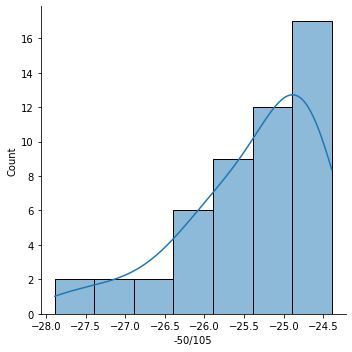

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.displot(df_SE['-50/105'], kde = True)

In [ ]:
for numVds in range (0, 50, 25):
  print(numVds, numVds+24) 
  test = df_SE[['Vds']].iloc[numVds : numVds+25]
  print(test)

In [212]:
df.head()

,Vds,-50/75,-50/90,-50/105,-50/120,-50/135,-50/150,-50/165,-50/180,-50/195,...,-20/165,-20/180,-20/195,-20/210,-20/225,-20/240,-20/255,-20/270,-20/285,-20/300
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.546340e-27,NaN,NaN,NaN,NaN,NaN,NaN
1,20.0,9.880657e-14,3.502587e-13,7.740376e-13,2.005366e-12,6.769055e-12,1.399433e-11,3.233598e-11,6.032723e-11,1.031820e-10,...,1.657045e-13,3.625161e-14,2.059043e-13,5.485598e-14,3.828553e-15,2.017169e-13,7.908354e-13,2.273203e-13,1.460832e-13,2.021954e-13
2,40.0,5.028026e-13,1.212455e-13,1.089032e-12,4.869303e-12,1.389955e-11,3.110293e-11,6.992620e-11,1.304215e-10,2.224456e-10,...,3.726857e-14,5.365956e-14,5.599258e-14,7.328089e-14,2.268417e-13,1.841295e-13,4.034936e-13,2.010588e-13,5.671044e-14,1.497323e-13
3,60.0,9.709509e-13,6.036551e-13,1.502222e-12,6.429139e-12,2.142727e-11,4.868090e-11,1.103079e-10,2.081668e-10,3.535873e-10,...,1.435707e-15,1.054647e-13,8.518530e-14,5.982113e-13,5.475428e-13,3.332037e-14,4.364550e-13,4.396853e-14,2.760745e-13,3.801035e-13
4,80.0,1.138761e-12,4.668202e-13,1.919816e-12,9.178638e-12,2.865755e-11,6.744888e-11,1.536022e-10,2.917704e-10,4.992213e-10,...,2.193043e-13,2.333024e-13,1.498519e-13,2.029731e-13,2.117668e-14,2.950977e-13,2.950378e-13,9.834595e-14,8.943260e-14,1.339993e-14


In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model_SE = LinearRegression() # 예측모델 인스턴스를 만들기

model_columns = column_names[1:]

coef_SE_low = pd.DataFrame(columns = ['SE: MAE_low', 'SE: slope_low', 'SE: intercept_low'])
coef_SE_high = pd.DataFrame(columns = ['SE: MAE_high', 'SE: slope_high', 'SE: intercept_high'])

cycle = 1

for Vds in range (0, 50, 25) :
  print(cycle)
  print(Vds, Vds+25)

  X_feature = df_SE[['Vds']].iloc[Vds : Vds+25] # make feature table (2-D)
  
  for x in model_columns :
#  print(x)
    y_target = df_SE[[x]].iloc[Vds : Vds+25] # make target vector (1-D or 2-D)
    model_SE.fit(X_feature.values, y_target) # learn (.fit)
    y_pred = model_SE.predict(X_feature.values) # predict with train data
    mae = r2_score(y_target, y_pred) # evaluate result from train data
  
    slope = model_SE.coef_ # slope by linear regression
    intercept = model_SE.intercept_ # intercept by linear regression

    if cycle == 1 :
      coef_SE_low = coef_SE_low.append({'SE: MAE_low' : mae, 'SE: slope_low': slope[0,0], 'SE: intercept_low' : intercept[0]}, ignore_index = True)
    if cycle == 2 :
      coef_SE_high = coef_SE_high.append({'SE: MAE_high' : mae, 'SE: slope_high': slope[0,0], 'SE: intercept_high' : intercept[0]}, ignore_index = True)
  
  cycle = cycle + 1
  print(cycle)

#coef_SE.index = model_columns
coef_SE_low.index = model_columns
coef_SE_low

1
0 25
2
2
25 50
3


,SE: MAE_low,SE: slope_low,SE: intercept_low
-50/75,0.271214,0.051720,-28.836593
-50/90,0.848979,0.130736,-29.563682
-50/105,0.972200,0.141556,-28.233748
-50/120,0.934974,0.141744,-26.848324
-50/135,0.927121,0.142364,-25.659934
...,...,...,...
-20/240,0.046038,0.033994,-29.762097
-20/255,0.026660,-0.015195,-28.297575
-20/270,0.004723,0.010270,-30.020747
-20/285,0.153367,0.058598,-30.315706


In [195]:
coef_SE_high.index = model_columns
coef_SE_high

,SE: MAE_high,SE: slope_high,SE: intercept_high
-50/75,0.622522,0.077024,-29.545099
-50/90,0.964247,0.096031,-28.889187
-50/105,0.986556,0.082244,-27.013109
-50/120,0.996287,0.067274,-25.387648
-50/135,0.995701,0.056414,-23.967616
...,...,...,...
-20/240,0.000127,0.002440,-28.866407
-20/255,0.001066,-0.005157,-28.230803
-20/270,0.296446,-0.233109,-23.490822
-20/285,0.209357,0.192329,-34.318147


In [196]:
model_FN = LinearRegression() # 예측모델 인스턴스를 만들기

model_columns = column_names[1:]

coef_FN_low = pd.DataFrame(columns = ['FN: MAE_low', 'FN: slope_low', 'FN: intercept_low'])
coef_FN_high = pd.DataFrame(columns = ['FN: MAE_high', 'FN: slope_high', 'FN: intercept_high'])

cycle = 1

for Vds in range (0, 50, 25) :
  print(cycle)
  print(Vds, Vds+25)

  X_feature = df_FN[['Vds']].iloc[Vds : Vds+25] # make feature table (2-D)
  
  for x in model_columns :
    
    y_target = df_FN[[x]].iloc[Vds : Vds+25] # make target vector (1-D or 2-D)
    model_FN.fit(X_feature.values, y_target) # learn (.fit)
    y_pred = model_FN.predict(X_feature.values) # predict with train data
    mae = r2_score(y_target, y_pred) # evaluate result from train data
  
    slope = model_FN.coef_ # slope by linear regression
    intercept = model_FN.intercept_ # intercept by linear regression

    if cycle == 1 :
      coef_FN_low = coef_FN_low.append({'FN: MAE_low' : mae, 'FN: slope_low': slope[0,0], 'FN: intercept_low' : intercept[0]}, ignore_index = True)
    if cycle == 2 :
      coef_FN_high = coef_FN_high.append({'FN: MAE_high' : mae, 'FN: slope_high': slope[0,0], 'FN: intercept_high' : intercept[0]}, ignore_index = True)
  
  cycle = cycle + 1
  print(cycle)

coef_FN_low.index = model_columns
coef_FN_low

1
0 25
2
2
25 50
3


,FN: MAE_low,FN: slope_low,FN: intercept_low
-50/75,0.610845,108.023448,-39.500490
-50/90,0.836193,93.249698,-38.904415
-50/105,0.837021,83.080403,-37.331127
-50/120,0.758704,77.483093,-35.900098
-50/135,0.754751,76.681362,-34.696091
...,...,...,...
-20/240,0.662404,133.413844,-40.891316
-20/255,0.778580,156.012296,-40.352770
-20/270,0.757048,154.415149,-41.673668
-20/285,0.703103,127.259415,-41.021048


In [197]:
coef_FN_high.index = model_columns
coef_FN_high

,FN: MAE_high,FN: slope_high,FN: intercept_high
-50/75,0.567774,675.585545,-41.584038
-50/90,0.886147,504.462135,-40.172703
-50/105,0.975096,633.345488,-38.851068
-50/120,0.993771,780.235972,-37.837136
-50/135,0.995580,887.096020,-36.861159
...,...,...,...
-20/240,0.326126,1453.218242,-44.014655
-20/255,0.477664,1477.422380,-43.620611
-20/270,0.504027,3609.915997,-48.049979
-20/285,0.008886,-346.241774,-41.796636


In [198]:
model_DT = LinearRegression() # 예측모델 인스턴스를 만들기

model_columns = column_names[1:]

coef_DT_low = pd.DataFrame(columns = ['DT: MAE_low', 'DT: slope_low', 'DT: intercept_low'])
coef_DT_high = pd.DataFrame(columns = ['DT: MAE_high', 'DT: slope_high', 'DT: intercept_high'])

cycle = 1

for Vds in range (0, 50, 25) :
  print(cycle)
  print(Vds, Vds+25)

  X_feature = df_DT[['Vds']].iloc[Vds : Vds+25] # make feature table (2-D)
  
  for x in model_columns :
    
    y_target = df_DT[[x]].iloc[Vds : Vds+25] # make target vector (1-D or 2-D)
    model_DT.fit(X_feature.values, y_target) # learn (.fit)
    y_pred = model_DT.predict(X_feature.values) # predict with train data
    mae = r2_score(y_target, y_pred) # evaluate result from train data
  
    slope = model_DT.coef_ # slope by linear regression
    intercept = model_DT.intercept_ # intercept by linear regression

    if cycle == 1 :
      coef_DT_low = coef_DT_low.append({'DT: MAE_low' : mae, 'DT: slope_low': slope[0,0], 'DT: intercept_low' : intercept[0]}, ignore_index = True)
    if cycle == 2 :
      coef_DT_high = coef_DT_high.append({'DT: MAE_high' : mae, 'DT: slope_high': slope[0,0], 'DT: intercept_high' : intercept[0]}, ignore_index = True)
  
  cycle = cycle + 1
  print(cycle)

coef_DT_low.index = model_columns
coef_DT_low

1
0 25
2
2
25 50
3


,DT: MAE_low,DT: slope_low,DT: intercept_low
-50/75,0.916971,1.637875,-29.969324
-50/90,0.915195,1.207262,-31.775084
-50/105,0.993834,1.120309,-30.741639
-50/120,0.997083,1.099226,-29.465404
-50/135,0.997666,1.091016,-28.311160
...,...,...,...
-20/240,0.779315,1.790798,-30.353454
-20/255,0.934147,2.114781,-27.920181
-20/270,0.824444,1.994157,-29.894490
-20/285,0.790243,1.669596,-31.174450


In [199]:
coef_DT_high.index = model_columns
coef_DT_high

,DT: MAE_high,DT: slope_high,DT: intercept_high
-50/75,0.581424,0.952294,-34.361716
-50/90,0.879663,0.700109,-34.852345
-50/105,0.980580,0.884689,-32.133656
-50/120,0.996912,1.088537,-29.570602
-50/135,0.997140,1.236638,-27.468957
...,...,...,...
-20/240,0.314885,1.989053,-28.871857
-20/255,0.483478,2.070445,-27.906355
-20/270,0.523312,5.123687,-9.225402
-20/285,0.012378,-0.569239,-46.035120


In [200]:
result_low = pd.concat([coef_SE_low['SE: MAE_low'], coef_FN_low['FN: MAE_low'], coef_DT_low['DT: MAE_low']], axis = 1)
result_low.columns = ['SE', 'FN', 'DT']
result_high = pd.concat([coef_SE_high['SE: MAE_high'], coef_FN_high['FN: MAE_high'], coef_DT_high['DT: MAE_high']], axis = 1)
result_high.columns = ['SE', 'FN', 'DT']

In [201]:
result_low['MAX_value'] = result_low.max(axis=1)
result_low['MAX'] =  result_low[['SE', 'FN', 'DT']].idxmax(axis=1)

In [202]:
condition = result_low['MAX_value'] > 0.5
result_low = result_low[condition]

In [203]:
print(result_low.head(60))

               SE        FN        DT  MAX_value MAX
-50/75   0.271214  0.610845  0.916971   0.916971  DT
-50/90   0.848979  0.836193  0.915195   0.915195  DT
-50/105  0.972200  0.837021  0.993834   0.993834  DT
-50/120  0.934974  0.758704  0.997083   0.997083  DT
-50/135  0.927121  0.754751  0.997666   0.997666  DT
-50/150  0.912296  0.732189  0.994222   0.994222  DT
-50/165  0.904091  0.725320  0.991595   0.991595  DT
-50/180  0.904591  0.724520  0.990498   0.990498  DT
-50/195  0.910251  0.730672  0.990764   0.990764  DT
-50/210  0.921911  0.747366  0.993330   0.993330  DT
-50/225  0.931813  0.763320  0.995398   0.995398  DT
-50/240  0.939648  0.776833  0.997192   0.997192  DT
-50/255  0.945150  0.786082  0.998407   0.998407  DT
-50/270  0.949155  0.793732  0.998999   0.998999  DT
-50/285  0.949586  0.792882  0.999391   0.999391  DT
-50/300  0.946847  0.788013  0.999226   0.999226  DT
-48/90   0.169692  0.539016  0.729352   0.729352  DT
-48/105  0.770714  0.473335  0.789862   0.7898

In [204]:
print(result_low.tail(60))

               SE        FN        DT  MAX_value MAX
-28/300  0.932461  0.812377  0.982779   0.982779  DT
-26/75   0.006010  0.619541  0.789236   0.789236  DT
-26/90   0.000097  0.604474  0.730591   0.730591  DT
-26/105  0.000249  0.643200  0.726952   0.726952  DT
-26/120  0.021983  0.768443  0.810204   0.810204  DT
-26/135  0.011707  0.535646  0.788491   0.788491  DT
-26/150  0.067897  0.785233  0.888765   0.888765  DT
-26/165  0.064246  0.489327  0.611697   0.611697  DT
-26/180  0.102344  0.755552  0.866824   0.866824  DT
-26/195  0.004995  0.683714  0.767733   0.767733  DT
-26/210  0.004433  0.605211  0.641399   0.641399  DT
-26/225  0.031503  0.612980  0.723343   0.723343  DT
-26/255  0.398631  0.259285  0.637653   0.637653  DT
-26/270  0.748544  0.870028  0.836938   0.870028  FN
-26/285  0.771459  0.697061  0.852566   0.852566  DT
-26/300  0.858869  0.682761  0.891235   0.891235  DT
-24/75   0.024150  0.656254  0.805052   0.805052  DT
-24/90   0.005949  0.600410  0.734176   0.7341

In [205]:
result_high['MAX_value'] = result_high.max(axis=1)
result_high['MAX'] =  result_high[['SE', 'FN', 'DT']].idxmax(axis=1)

condition = result_high['MAX_value'] > 0.5
result_high = result_high[condition]

In [206]:
print(result_high.head(60))

               SE        FN        DT  MAX_value MAX
-50/75   0.622522  0.567774  0.581424   0.622522  SE
-50/90   0.964247  0.886147  0.879663   0.964247  SE
-50/105  0.986556  0.975096  0.980580   0.986556  SE
-50/120  0.996287  0.993771  0.996912   0.996912  DT
-50/135  0.995701  0.995580  0.997140   0.997140  DT
-50/150  0.995703  0.993166  0.998996   0.998996  DT
-50/165  0.997058  0.994305  0.999272   0.999272  DT
-50/180  0.996291  0.991705  0.999794   0.999794  DT
-50/195  0.999068  0.993567  0.999866   0.999866  DT
-50/210  0.995839  0.991583  0.999845   0.999845  DT
-50/225  0.992837  0.990070  0.999821   0.999821  DT
-50/240  0.984000  0.986858  0.999172   0.999172  DT
-50/255  0.984789  0.985789  0.998982   0.998982  DT
-50/270  0.985885  0.984893  0.998731   0.998731  DT
-50/285  0.990479  0.987263  0.999345   0.999345  DT
-50/300  0.989084  0.986867  0.999246   0.999246  DT
-48/90   0.560218  0.011260  0.016353   0.560218  SE
-48/105  0.918516  0.905773  0.880565   0.9185

In [207]:
print(result_high.tail(60))

               SE        FN        DT  MAX_value MAX
-40/285  0.993900  0.990506  0.999799   0.999799  DT
-40/300  0.995600  0.991043  0.999884   0.999884  DT
-38/165  0.514274  0.480517  0.459322   0.514274  SE
-38/180  0.914716  0.963639  0.973536   0.973536  DT
-38/195  0.981724  0.996439  0.994338   0.996439  FN
-38/210  0.993771  0.993281  0.998968   0.998968  DT
-38/225  0.996454  0.995060  0.999177   0.999177  DT
-38/240  0.997938  0.994301  0.999524   0.999524  DT
-38/255  0.998310  0.993932  0.999710   0.999710  DT
-38/270  0.998080  0.992802  0.999891   0.999891  DT
-38/285  0.998590  0.993178  0.999880   0.999880  DT
-38/300  0.994035  0.990626  0.999735   0.999735  DT
-36/180  0.420952  0.685259  0.662203   0.685259  FN
-36/195  0.878440  0.960768  0.960708   0.960768  FN
-36/210  0.969155  0.990899  0.992320   0.992320  DT
-36/225  0.989616  0.994899  0.998131   0.998131  DT
-36/240  0.997397  0.995262  0.999244   0.999244  DT
-36/255  0.995602  0.993050  0.999536   0.9995

In [208]:
result_change_at = pd.concat([result_low['MAX'], result_high['MAX']], axis = 1)
result_change_at.columns = ['low', 'high']
result_change_at

,low,high
-50/75,DT,SE
-50/90,DT,SE
-50/105,DT,SE
-50/120,DT,DT
-50/135,DT,DT
...,...,...
-20/240,DT,NaN
-20/255,DT,NaN
-20/270,DT,DT
-20/285,DT,NaN


In [209]:
result_change_at.tail(60)

,low,high
-28/300,DT,DT
-26/75,DT,NaN
-26/90,DT,NaN
-26/105,DT,NaN
-26/120,DT,NaN
-26/135,DT,NaN
-26/150,DT,NaN
-26/165,DT,NaN
-26/180,DT,NaN
-26/195,DT,NaN


In [210]:
result_change_at.to_csv('result_10nm')